Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5697/5697 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9912 - loss: 0.0477 - val_accuracy: 0.9993 - val_loss: 0.0048
Epoch 2/20
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9988 - loss: 0.0078 - val_accuracy: 0.9991 - val_loss: 0.0046
Epoch 3/20
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9988 - loss: 0.0068 - val_accuracy: 0.9994 - val_loss: 0.0048
Epoch 4/20
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9991 - loss: 0.0054 - val_accuracy: 0.9993 - val_loss: 0.0041
Epoch 5/20
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9989 - loss: 0.0062 - val_accuracy: 0.9991 - val_loss: 0.0041
Epoch 6/20
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9987 - loss: 0.0053 - val_accuracy: 0.9994 - val_loss: 0.0048
Epoch 7/20
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9991 - loss: 0.0047 - val_accuracy: 0.9993 - val_loss: 0.0037
Epoch 8/20
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9991 - loss: 0.0042 - val

Accuracy: 0.9993153330290369

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.79      0.80        98

    accuracy                           1.00     56962
   macro avg       0.91      0.89      0.90     56962
weighted avg       1.00      1.00      1.00     56962

Number of Non-Fraudulent Transactions: 284315
Number of Fraudulent Transactions: 492


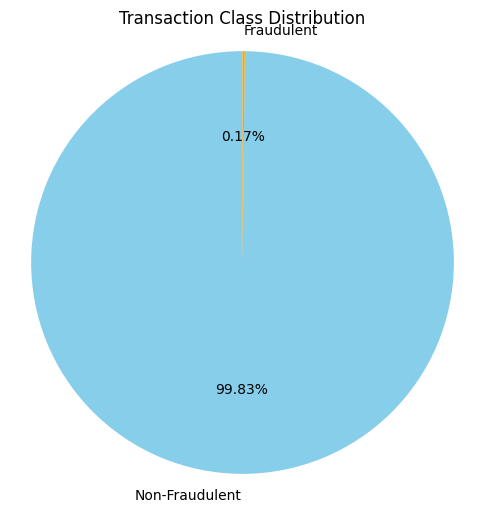

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load dataset
data = pd.read_csv('creditcard.csv')

# Split the dataset into features (X) and target (y)
X = data.drop(columns=['Class'])  # 'Class' is the target column (0: Not Fraud, 1: Fraud)
y = data['Class']

# Standardize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Build the ANN model
model = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Save the trained model
model.save("credit_card_fraud_model.h5")

# Display fraudulent and non-fraudulent transactions
fraudulent_count = data['Class'].value_counts()
print("Number of Non-Fraudulent Transactions:", fraudulent_count[0])
print("Number of Fraudulent Transactions:", fraudulent_count[1])

# Visualizing the class distribution
import matplotlib.pyplot as plt

labels = ['Non-Fraudulent', 'Fraudulent']
plt.figure(figsize=(6, 6))
plt.pie(fraudulent_count, labels=labels, autopct='%1.2f%%', colors=['skyblue', 'orange'], startangle=90)
plt.title('Transaction Class Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()